In [23]:
import torch
import torchvision
from torchvision import transforms, datasets

In [24]:
train = datasets.MNIST("data/",train=True, download=True, 
                       transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("data/",train=False, download=True, 
                       transform=transforms.Compose([transforms.ToTensor()]))

In [25]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [26]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [27]:
x,y = data[0][0], data[1][0]
print(len(x), y)

1 tensor(6)


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


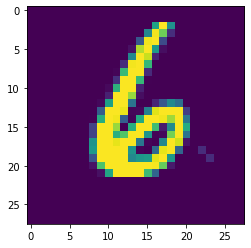

In [30]:
plt.imshow(data[0][0].view(28,28))

In [31]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
  X_train, y_train = data
  for y in y_train:
    counter_dict[int(y)] += 1
    total += 1
    
print(counter_dict)
for x in counter_dict:
  print(F"{x}: {counter_dict[x]/total*100}")


{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [32]:
import torch.nn as nn
import torch.nn.functional as F

In [33]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return F.log_softmax(x, dim=1)
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [34]:
X = torch.rand((28,28))

In [35]:
X = X.view(-1,28*28)
output = net(X)
print(output)

tensor([[-2.2517, -2.3213, -2.3396, -2.3257, -2.1941, -2.4188, -2.2639, -2.2811,
         -2.3419, -2.3044]], grad_fn=<LogSoftmaxBackward>)


In [36]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

In [37]:
for epoch in range(EPOCHS):
  for data in trainset:
    X, y = data
    net.zero_grad()
    output = net(X.view(-1, 28*28))
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()
  print(loss)

tensor(0.0127, grad_fn=<NllLossBackward>)
tensor(0.0163, grad_fn=<NllLossBackward>)
tensor(0.0012, grad_fn=<NllLossBackward>)


In [38]:
correct = 0
train = 0

with torch.no_grad():
  for data in trainset:
    X, y = data
    output = net(X.view(-1, 784))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.487


In [54]:
a = 1
import matplotlib.pyplot as pyplot
plt.imshow(X[a].view(28,28))
plt.show()
print(torch.argmax(net(X[a].view(-1,784))[0]))

IndexError: index 10 is out of bounds for dimension 0 with size 10